### Source of Dataset:
#### https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [1]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
seed = 79
np.random.seed(seed)

#### Read the dataset:

In [3]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df = pd.read_csv(url)

**Data Set Information:**                                                                                                       
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).   

In [4]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

**Attribute Information:**

date time year-month-day hour:minute:second                                                                                     
Appliances, energy use in Wh                                                                                                   
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.


In [5]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [6]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
df = df.drop_duplicates()

#### The above indicates we have a good dataset with no nulls or missing data 

### Column wise statistics

In [8]:
# Group columns based on their type:
col_time = ["date"]
# Columns for temperature sensors
col_temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
col_humid = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
col_weather = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Column with lights
col_light = ["lights"]
# columns with Randoms
col_randoms = ["rv1", "rv2"]
# Target variable column
col_target = ["Appliances"]

In [9]:
df[col_humid].describe()

RH_1          RH_2          RH_3          RH_4          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     40.420420     39.242500     39.026904     50.949283   
std        3.979299      4.069813      3.254576      4.341321      9.022034   
min       27.023333     20.463333     28.766667     27.660000     29.815000   
25%       37.333333     37.900000     36.900000     35.530000     45.400000   
50%       39.656667     40.500000     38.530000     38.400000     49.090000   
75%       43.066667     43.260000     41.760000     42.156667     53.663333   
max       63.360000     56.026667     50.163333     51.090000     96.321667   

               RH_6          RH_7          RH_8          RH_9  
count  19735.000000  19735.000000  19735.000000  19735.000000  
mean      54.609083     35.388200     42.936165     41.552401  
std       31.149806      5.114208      5.224361      4.151497  
min        1.000000     23.200000     29.600000     29.166667  
25%       30.025000     31.500000     39.066667     38.500000  
50%       55.290000     34.863333     42.375000     40.900000  
75%       83.226667     39.000000     46.536000     44.338095  
max       99.900000     51.400000     58.780000     53.326667

In [10]:
df[col_weather].describe()

T_out     Tdewpoint        RH_out   Press_mm_hg     Windspeed  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665      3.760707     79.750418    755.522602      4.039752   
std        5.317409      4.194648     14.901088      7.399441      2.451221   
min       -5.000000     -6.600000     24.000000    729.300000      0.000000   
25%        3.666667      0.900000     70.333333    750.933333      2.000000   
50%        6.916667      3.433333     83.666667    756.100000      3.666667   
75%       10.408333      6.566667     91.666667    760.933333      5.500000   
max       26.100000     15.500000    100.000000    772.300000     14.000000   

         Visibility  
count  19735.000000  
mean      38.330834  
std       11.794719  
min        1.000000  
25%       29.000000  
50%       40.000000  
75%       40.000000  
max       66.000000

In [11]:
df[col_temp].describe()

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9  
count  19735.000000  19735.000000  19735.000000  19735.000000  
mean       7.910939     20.267106     22.029107     19.485828  
std        6.090347      2.109993      1.956162      2.014712  
min       -6.065000     15.390000     16.306667     14.890000  
25%        3.626667     18.700000     20.790000     18.000000  
50%        7.300000     20.033333     22.100000     19.390000  
75%       11.256000     21.600000     23.390000     20.600000  
max       28.290000     26.000000     27.230000     24.500000

In [12]:
df[col_target].describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

### Observations
Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. 
Humidity ranges for all home sensors is between 20.60% to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82% to 96.32% and 1% to 99.9% respectively.
Although, in Appliances column, the max consumption is 1080Wh, 75% of values are around 100Wh. 
This shows that there are fewer cases when Appliance energy consumption is very high.

### Exploratory Visualization

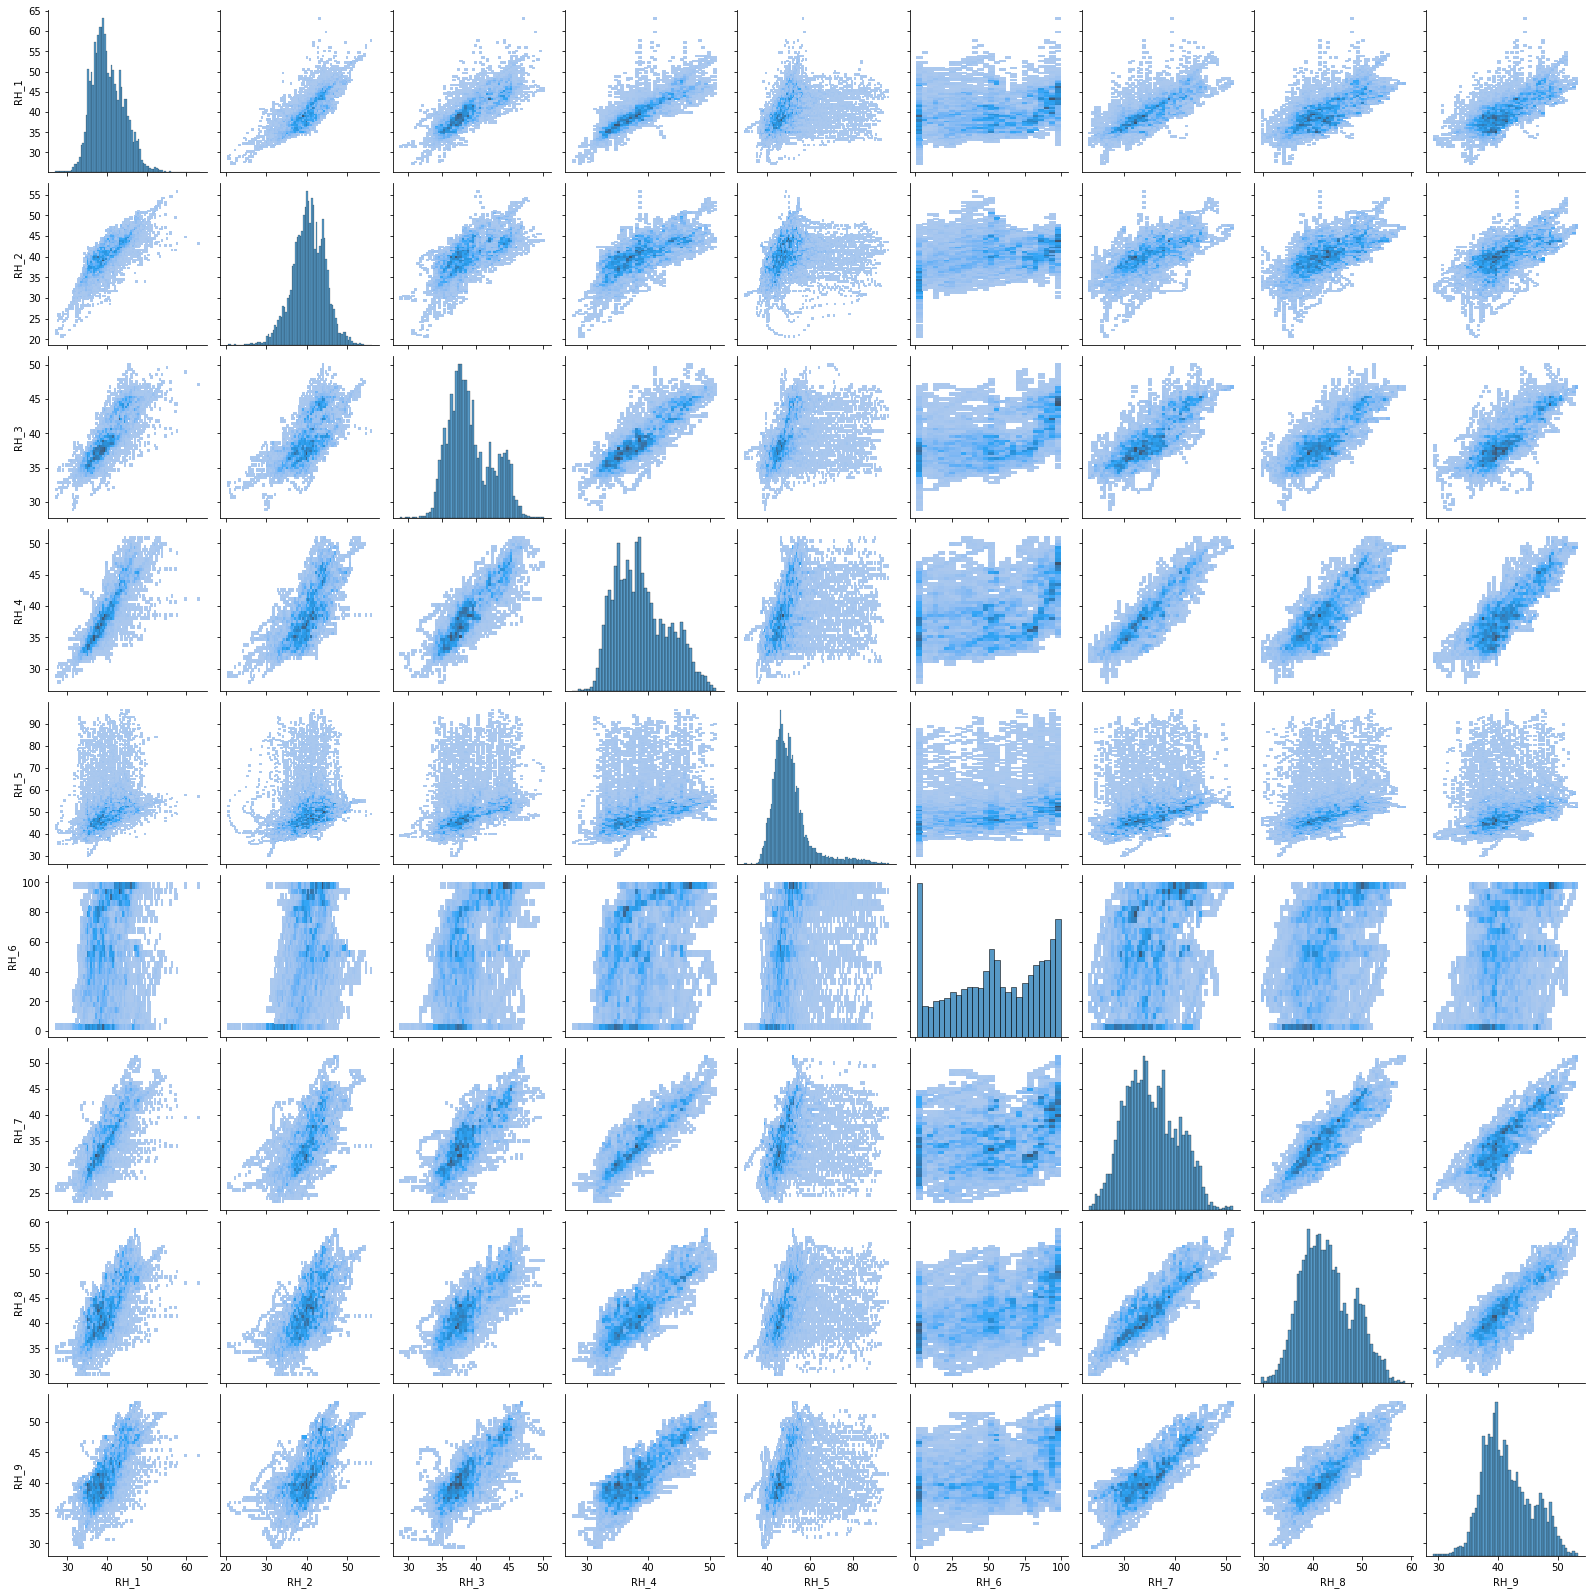

In [13]:
import seaborn as sns
sns.pairplot(df[col_humid], kind ="hist")

#### Above plots indicate No significant correlation among humidity sensors.

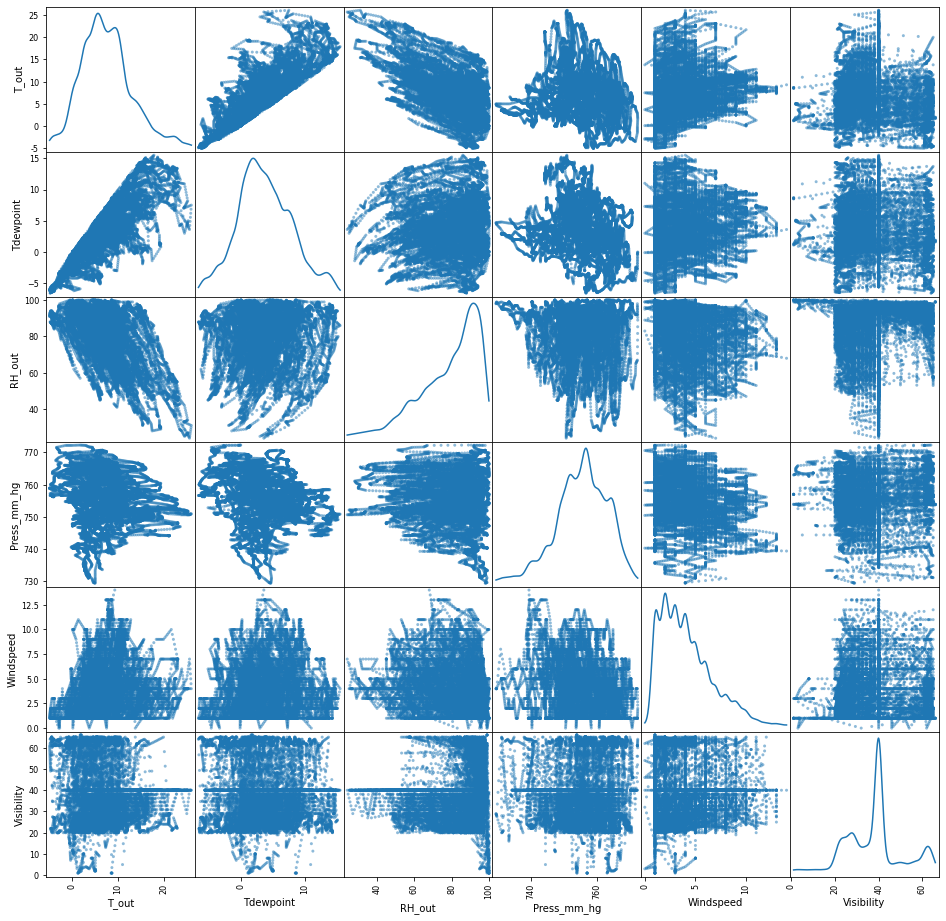

In [14]:
weather_scatter = pd.plotting.scatter_matrix(df[col_weather], diagonal="kde", figsize=(16, 16))

#### We can see from above, that the features of weather data are uncorrelated to one another.

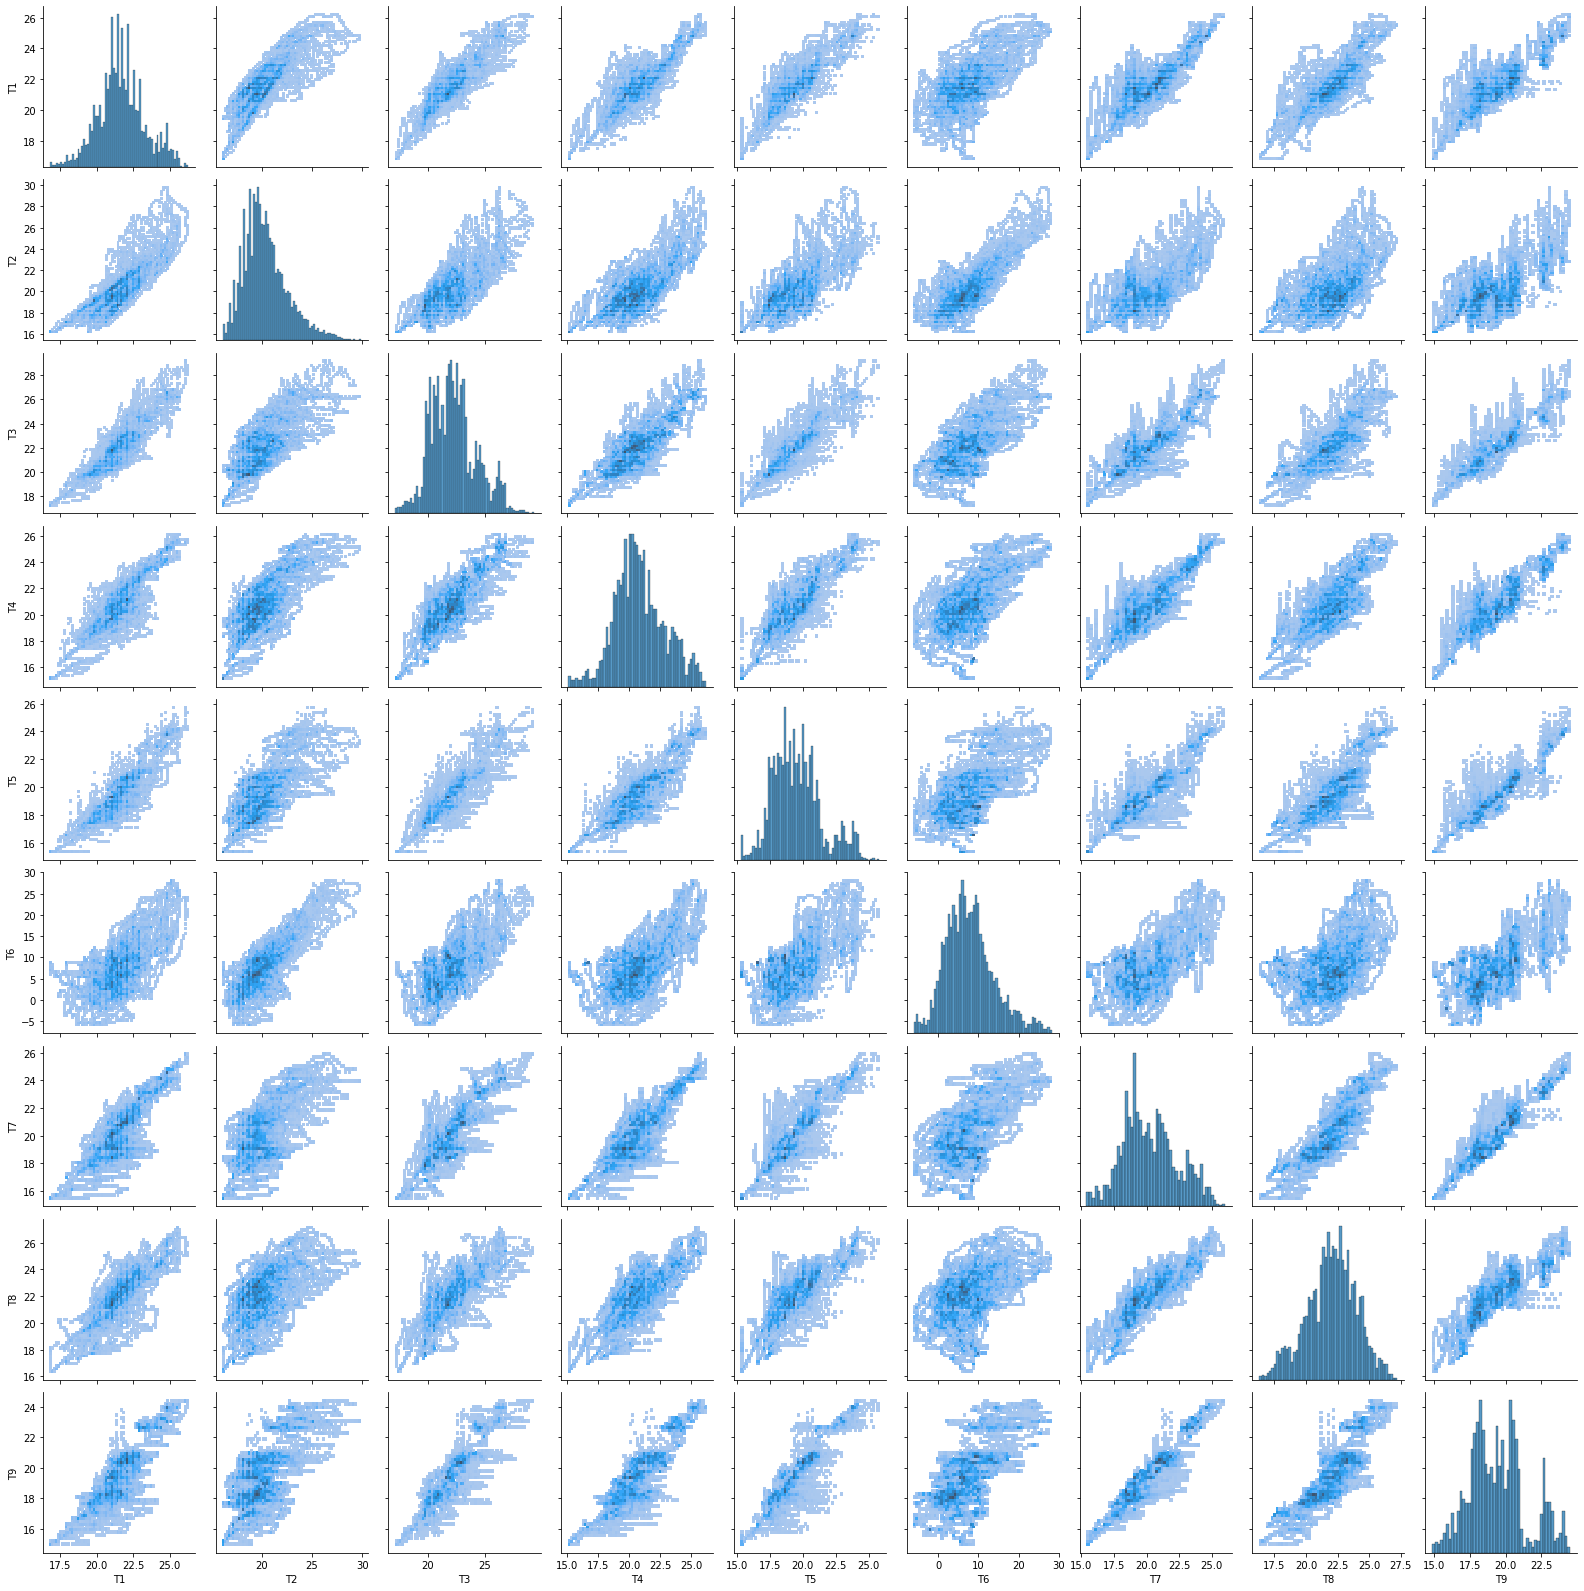

In [15]:
sns.pairplot(df[col_temp], kind = "hist")

#### From the above chart, there appears to be a significant correlation between the columns T7 and T9. Need to check this correlation statistically. 
#### Checking the plot between these two columns once more:
#### checking the correlation between T7 and T9

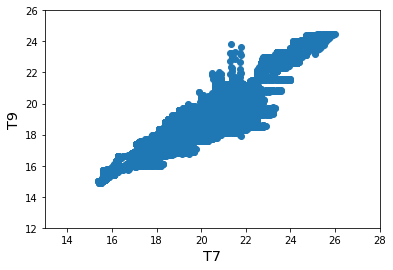

In [16]:
plt.xlabel("T7", fontsize='x-large')
plt.ylabel("T9", fontsize='x-large')

plt.xlim(int(df.T7.min()) - 2, int(df.T7.max()) + 2)
plt.ylim(int(df.T9.min()) - 2, int(df.T9.max()) + 2)

plt.scatter(df["T7"], df["T9"])

In [17]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(df["T7"], df["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9447764235687497
p-value : 0.0


**The above values indicate that there very high positive correlation between columns 'T7' and 'T9'.
Also, p-value is 0.0.**

#### To calculate which column pairs have a high degree of correlation (> 0.9):

In [18]:
df1 = df.drop (['date','Appliances'],axis=1)
# To generate all pairs for given columns
from itertools import combinations
from scipy import stats
for pair in combinations(df1.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = stats.pearsonr(df1[col_1], df1[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.9013235850825672
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067842
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664529
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687497
p-value : 0.0
Column pair : rv1, rv2
Correlation coefficient : 0.9999999999999977
p-value : 0.0


#### The above shows that 3 columns T3, T5 and T7 have a high degree of correlation with T9, all of which have a p-value of  0.0 
**Also:**                                                                                                                       
**T6 has high +ve correlation with T_out**                                                                               
**rv1 and rv2 have a correlation of almost 1**                                                                                 
**T9 can be considered as redundant**

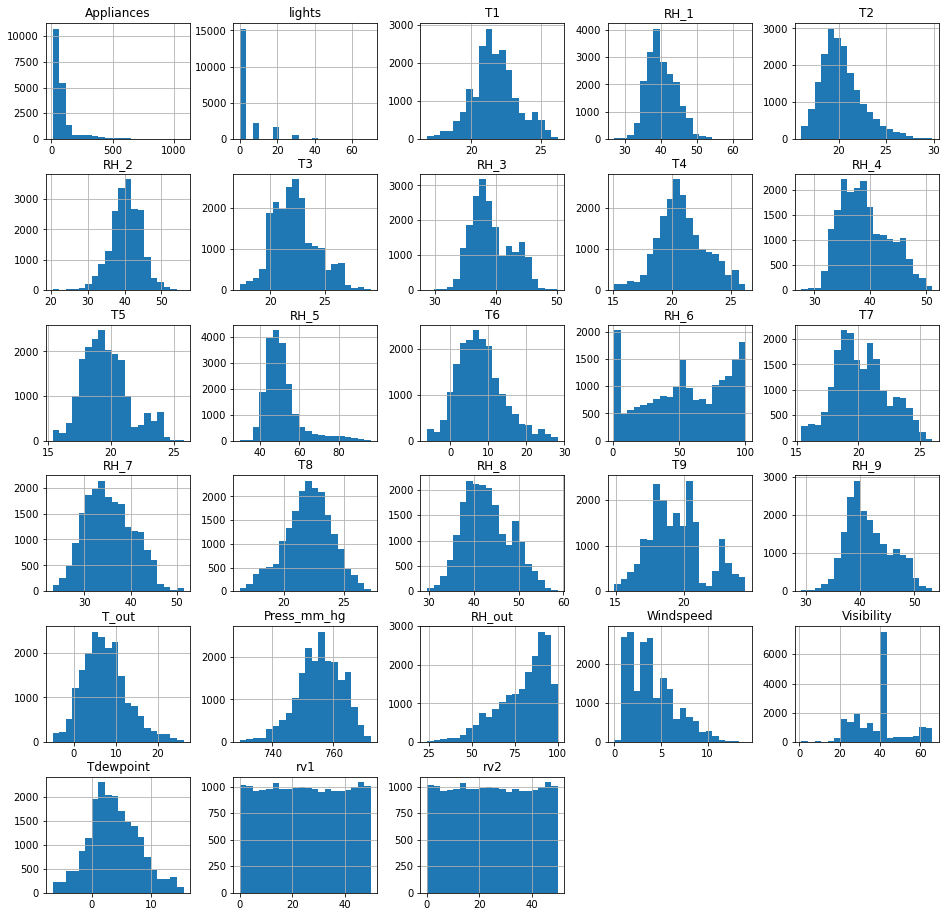

In [19]:
histograms = df.hist(figsize=(16, 16), bins=20)

### Observations from the above histograms
1. All humidity values except RH_6 and RH_out follow a Normal distribution 
2. All temperature readings follow a Normal distribution except for T9
3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
4. There is no similarity between target variable, Appliances and the remaining 24 columns. Windspeed looks similar but the number of observations are different as seen from the y-axes of both plots.

c:\users\sphoo\anaconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sphoo\anaconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sphoo\anaconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

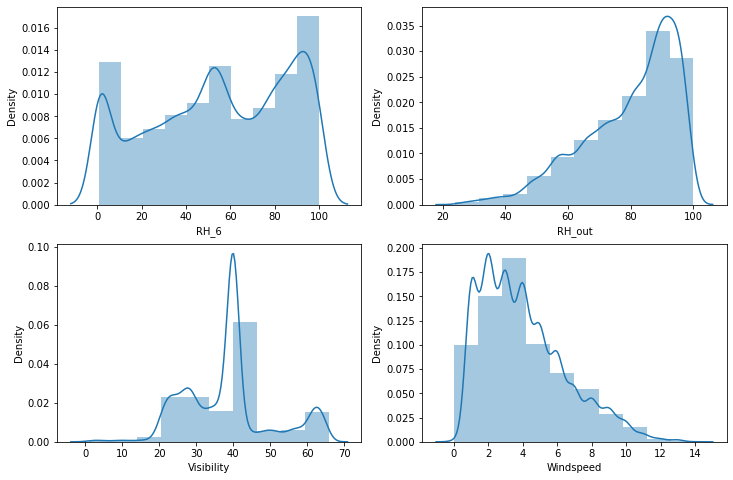

In [20]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(df["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

In [21]:
from datetime import datetime
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['week'] = df['date'].dt.week

c:\users\sphoo\anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [22]:
df.head(3)

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   

      T3       RH_3         T4  ...  Visibility  Tdewpoint        rv1  \
0  19.79  44.730000  19.000000  ...   63.000000        5.3  13.275433   
1  19.79  44.790000  19.000000  ...   59.166667        5.2  18.606195   
2  19.79  44.933333  18.926667  ...   55.333333        5.1  28.642668   

         rv2  year  month  day  weekday  hour  week  
0  13.275433  2016      1   11        0    17     2  
1  18.606195  2016      1   11        0    17     2  
2  28.642668  2016      1   11        0    17     2  

[3 rows x 35 columns]

In [23]:
# Functions to be used for plots

def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)


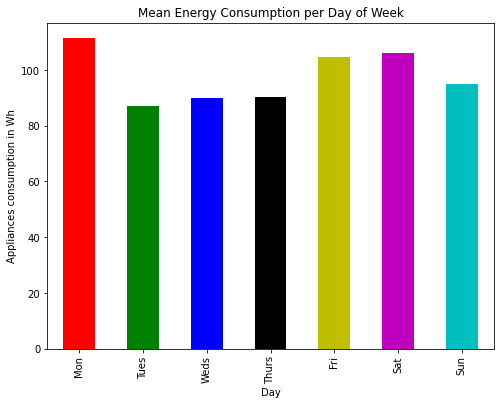

In [24]:
import matplotlib.pyplot as plt
# Plot of Mean Energy Consumption per Day of Week
daily('Appliances').plot(kind = 'bar', figsize=(8,6),color = list('rgbkymc'))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

**The above chart indicates that power load is the highest on Monday, followed by Saturday, Friday and Sunday than the other days.**

In [25]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the appliance energy consumption
pltData = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[pltData],layout=layout)
iplot(fig)

In [26]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation 
df['WEEKDAY'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
df['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [27]:
# Find rows with weekday 
temp_weekday =  df[df['WEEKDAY'] == 0]
# To understand the timeseries variation of the appliance energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays', title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [28]:
# Find rows with weekend 

temp_weekend =  df[df['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekend',title_x=0.5, xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

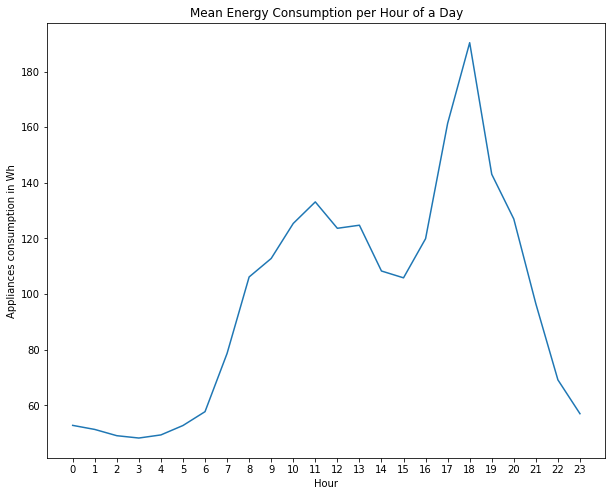

In [29]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);


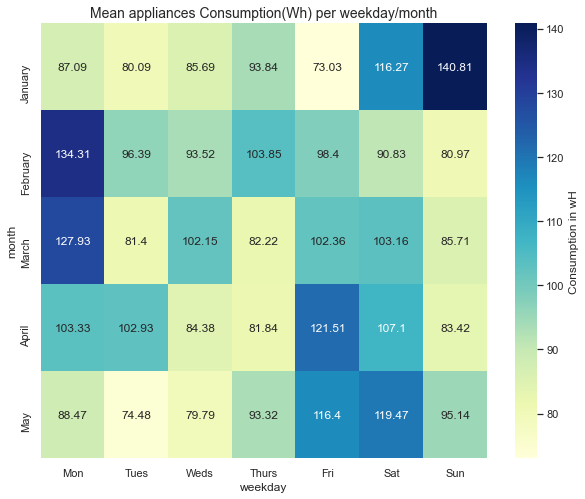

In [30]:
import seaborn as sns
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

**It can be seen from the heatmap above that the observation that more power is consumed on Monday ,Friday, Saturday and Sunday is valid for each month.**

In [31]:
df.head(1)

date  Appliances  lights     T1       RH_1    T2   RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.79   

      T3   RH_3    T4  ...  Tdewpoint        rv1        rv2  year  month  day  \
0  19.79  44.73  19.0  ...        5.3  13.275433  13.275433  2016      1   11   

   weekday  hour  week  WEEKDAY  
0        0    17     2      0.0  

[1 rows x 36 columns]

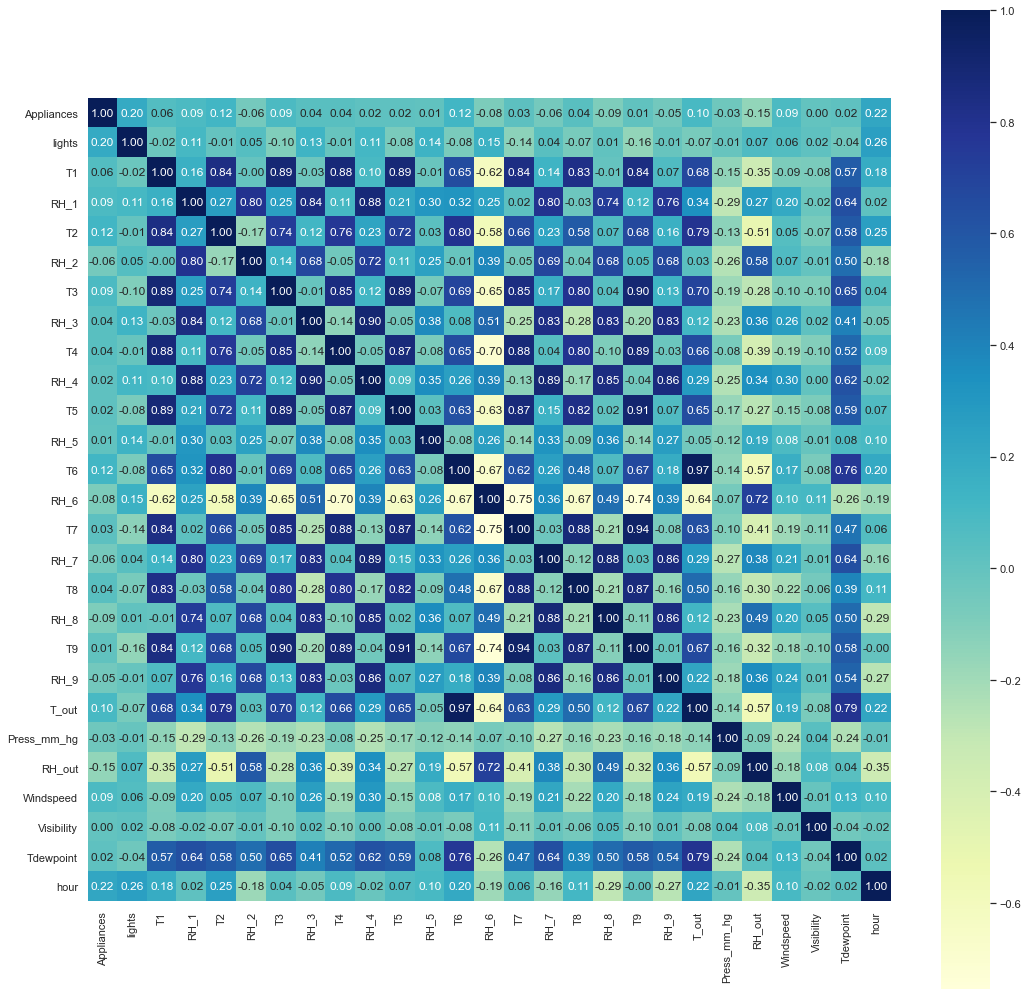

In [32]:
# Pearson Correlation among the variables
col = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hour']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', cmap="YlGnBu", xticklabels=col, yticklabels=col)
plt.show();

In [33]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df1, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

### Observations based on correlations:
**Temperature** - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . 
For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. 
Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . 
Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

**Weather attributes** - Visibility, Tdewpoint, Press_mm_hg have low correlation values

**Humidity** - There are no significantly high correlation cases (> 0.9) for humidity sensors.

**Random variables** have no role to play

### Data Preparation

In [34]:
#Split data into train and test:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [35]:
train.head()

date  Appliances  lights     T1   RH_1         T2  \
9544  2016-03-17 23:40:00          70      20  22.60  34.70  19.500000   
19366 2016-05-25 04:40:00          50       0  23.70  40.29  21.000000   
10816 2016-03-26 19:40:00         100      20  22.20  45.80  20.463333   
15457 2016-04-28 01:10:00          40       0  21.29  35.79  18.230000   
2956  2016-02-01 05:40:00          50      10  21.29  47.40  20.290000   

            RH_2         T3    RH_3         T4  ...  Tdewpoint        rv1  \
9544   37.863333  21.500000  35.345  22.890000  ...   0.400000  43.195492   
19366  42.900000  25.390000  40.000  23.600000  ...   5.300000  46.369677   
10816  44.930000  23.000000  38.560  20.390000  ...   7.133333  25.722968   
15457  37.863333  21.290000  34.790  20.533333  ...  -0.450000   3.791656   
2956   47.290000  21.666667  46.760  18.790000  ...   9.633333   8.706206   

             rv2  year  month  day  weekday  hour  week  WEEKDAY  
9544   43.195492  2016      3   17        3    23    11      0.0  
19366  46.369677  2016      5   25        2     4    21      0.0  
10816  25.722968  2016      3   26        5    19    12      1.0  
15457   3.791656  2016      4   28        3     1    17      0.0  
2956    8.706206  2016      2    1        0     5     5      0.0  

[5 rows x 36 columns]

In [36]:
# Separate dependent and independent variables 
feature_vars = train[ col_time + col_temp + col_humid + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [37]:
feature_vars.head(2)

date    T1    T2     T3     T4         T5        T6  \
9544  2016-03-17 23:40:00  22.6  19.5  21.50  22.89  19.166667  2.863333   
19366 2016-05-25 04:40:00  23.7  21.0  25.39  23.60  19.890000  5.500000   

         T7     T8     T9  ...   RH_9     T_out  Tdewpoint     RH_out  \
9544   21.0  22.89  19.89  ...  37.26  2.233333        0.4  87.666667   
19366  23.0  24.20  22.60  ...  44.59  6.266667        5.3  93.666667   

       Press_mm_hg  Windspeed  Visibility  lights        rv1        rv2  
9544    764.200000   1.333333   61.000000      20  43.195492  43.195492  
19366   757.233333   1.000000   25.333333       0  46.369677  46.369677  

[2 rows x 28 columns]

In [38]:
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

**The above indicates column lights to have very high number of zeros. Hence can be dopped**

In [39]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [40]:
train_X.head()

date     T1         T2         T3         T4         T5  \
9544  2016-03-17 23:40:00  22.60  19.500000  21.500000  22.890000  19.166667   
19366 2016-05-25 04:40:00  23.70  21.000000  25.390000  23.600000  19.890000   
10816 2016-03-26 19:40:00  22.20  20.463333  23.000000  20.390000  19.856667   
15457 2016-04-28 01:10:00  21.29  18.230000  21.290000  20.533333  19.290000   
2956  2016-02-01 05:40:00  21.29  20.290000  21.666667  18.790000  19.475556   

              T6         T7         T8         T9  ...       RH_9      T_out  \
9544    2.863333  21.000000  22.890000  19.890000  ...  37.260000   2.233333   
19366   5.500000  23.000000  24.200000  22.600000  ...  44.590000   6.266667   
10816  13.566667  20.890000  23.633333  19.963333  ...  41.363333  13.366667   
15457   0.066667  19.500000  22.200000  18.890000  ...  35.863333   0.316667   
2956   10.800000  19.044444  20.926667  17.600000  ...  52.900000  10.766667   

       Tdewpoint     RH_out  Press_mm_hg  Windspeed  Visibility  lights  \
9544    0.400000  87.666667   764.200000   1.333333   61.000000      20   
19366   5.300000  93.666667   757.233333   1.000000   25.333333       0   
10816   7.133333  66.333333   750.133333   6.333333   40.000000      20   
15457  -0.450000  94.333333   755.216667   2.000000   20.166667       0   
2956    9.633333  92.666667   758.666667   6.666667   59.000000      10   

             rv1        rv2  
9544   43.195492  43.195492  
19366  46.369677  46.369677  
10816  25.722968  25.722968  
15457   3.791656   3.791656  
2956    8.706206   8.706206  

[5 rows x 28 columns]

In [41]:
# Based on findings from above, redundant and highly correlated columns shall be dropped
train_X = train_X.drop(["rv1","rv2","Visibility","T6","T9","date","lights"],axis=1 )
test_X = test_X.drop(["rv1","rv2","Visibility","T6","T9","date","lights"], axis=1)

In [42]:
# Create test and training set by including Appliances column
X_train = train_X.copy()
X_train['Appliances'] = train['Appliances']
y_train = train_y.copy()
y_train['Appliances'] = train_y['Appliances']
X_test = test_X.copy()
X_test['Appliances'] = test['Appliances']
y_test = test_y.copy()
y_test['Appliances'] = test_y['Appliances']

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
scaler = StandardScaler().fit(X_test.values)
X_test_scaled = scaler.transform(X_test.values)

In [44]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [45]:
y_test_scaled_final = X_test_scaled_df['Appliances']

In [46]:
y_train_scaled_final = X_train_scaled_df['Appliances']

In [47]:
X_train_scaled_final= X_train_scaled_df.drop(['Appliances'],axis=1)
X_test_scaled_final= X_test_scaled_df.drop(['Appliances'],axis=1)

In [48]:
train_X = X_train_scaled_final.copy()
train_y = y_train_scaled_final.copy()
test_X = X_test_scaled_final.copy()
test_y = y_test_scaled_final.copy()

In [49]:
train_X.head()

T1        T2        T3        T4        T5        T7        T8  \
0  0.569827 -0.383584 -0.384018  0.996241 -0.229230  0.349500  0.441571   
1  1.254979  0.298556  1.561061  1.344290  0.163277  1.299615  1.112907   
2  0.320681  0.054501  0.366012 -0.229283  0.145189  0.297243  0.822507   
3 -0.246127 -0.961129 -0.489022 -0.159019 -0.162305 -0.363087  0.087967   
4 -0.246127 -0.024324 -0.300681 -1.013618 -0.061616 -0.579502 -0.564579   

       RH_1      RH_2      RH_3  ...      RH_5      RH_6      RH_7      RH_8  \
0 -1.398755 -0.629413 -1.197521  ...  2.267242  0.103642 -1.657784 -0.848083   
1  0.004687  0.604569  0.228904  ... -1.454588 -0.471944 -0.060622  0.086994   
2  1.388043  1.101918 -0.212353  ... -0.101804 -0.676999  0.311400  0.163327   
3 -1.125096 -0.629413 -1.367589  ...  1.009651 -0.110291 -1.110463  0.001120   
4  1.789743  1.680118  2.300361  ...  0.137914  1.453771  3.043131  2.777725   

       RH_9     T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  
0 -1.033732 -0.978251  -0.803979  0.529878     1.167725  -1.112160  
1  0.725258 -0.217827   0.365687  0.931169     0.226014  -1.248270  
2 -0.049050  1.120770   0.803317 -0.896934    -0.733721   0.929492  
3 -1.368892 -1.339609  -1.006881  0.975757    -0.046587  -0.839939  
4  2.719419  0.630579   1.400086  0.864287     0.419763   1.065602  

[5 rows x 21 columns]

In [50]:
train_y.head()

0   -0.270443
1   -0.464759
2    0.021032
3   -0.561918
4   -0.464759
Name: Appliances, dtype: float64

In [51]:
test_X.head()

T1        T2        T3        T4        T5        T7        T8  \
0 -0.678526 -0.337714 -0.758967 -0.272083 -0.811540 -0.409392 -0.946375   
1  0.814344  0.289201  1.432662  0.317741  1.062631  0.811654  1.049857   
2 -0.850621 -1.058130 -0.526796 -0.515812 -0.654758 -0.600348 -0.929458   
3  0.938750  0.485399  0.955147  1.146419  1.134714  1.502863  1.400044   
4  0.005706 -0.368370 -0.396714 -0.137220 -0.595289 -0.270881  0.339334   

       RH_1      RH_2      RH_3  ...      RH_5      RH_6      RH_7      RH_8  \
0 -0.352449 -0.426736  0.306431  ... -0.143165  1.086122 -0.407472 -0.731388   
1  0.671740  1.084770 -0.220306  ...  2.416950 -1.056634 -0.276865 -0.989635   
2 -0.182731  0.160016  0.427270  ...  0.788775  0.869462  0.702690  0.538598   
3 -0.419664 -0.511502 -0.885589  ... -1.035579 -1.365905 -0.346975 -0.678579   
4 -0.797748 -0.320955 -1.037265  ... -0.564532  0.039148 -1.025548 -1.028276   

       RH_9     T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  
0 -0.437093 -0.232839  -1.157146 -1.318014     0.377392  -0.809142  
1 -0.554766  0.865496   0.485626 -0.967649    -0.401660   0.004891  
2  0.705174 -1.611203  -1.275901  1.191050     0.616061  -0.876978  
3 -1.043214  0.591690   0.568755 -0.323430     0.701622  -1.216158  
4 -1.198139 -0.307513  -0.001268  0.524227     0.917775   0.004891  

[5 rows x 21 columns]

### Model Implementation

In [52]:
from time import time
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [53]:
models= [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
         ]

In [54]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[11:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.009972810745239258,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.014960050582885742,
  'Train_R2_Score': 0.1375528613228284,
  'Test_R2_Score': 0.12139099895516525,
  'Test_RMSE_Score': 0.9373414538175695},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.07735180854797363,
  'Train_R2_Score': 0.6814639376039895,
  'Test_R2_Score': 0.4855598647200512,
  'Test_RMSE_Score': 0.7172448224141802},
 {'Name': 'SVR:',
  'Train_Time': 9.79515552520752,
  'Train_R2_Score': 0.23572363185689515,
  'Test_R2_Score': 0.20993387920257733,
  'Test_RMSE_Score': 0.8888566368078841},
 {'Name': 'RandomForest ',
  'Train_Time': 26.79326033592224,
  'Train_R2_Score': 0.9393208146439452,
  'Test_R2_Score': 0.5573445355040687,
  'Test_RMSE_Score': 0.6653235787915015},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 8.096881866455078,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6290452743728374,


In [56]:
# Convert list to dataframe
models = pd.DataFrame(model_data)

In [57]:
models

Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0                       Lasso:     0.009973        0.000000       0.000000   
1                       Ridge:     0.014960        0.137553       0.121391   
2         KNeighborsRegressor:     0.077352        0.681464       0.485560   
3                          SVR:    9.795156        0.235724       0.209934   
4                 RandomForest    26.793260        0.939321       0.557345   
5          ExtraTreeRegressor :    8.096882        1.000000       0.629045   
6  GradientBoostingClassifier:     6.151317        0.333526       0.231988   
7                XGBRegressor:     1.105008        0.322174       0.226322   

   Test_RMSE_Score  
0         1.000000  
1         0.937341  
2         0.717245  
3         0.888857  
4         0.665324  
5         0.609061  
6         0.876363  
7         0.879590

### ExtraTreeRegressor is seen to perform the best, followed by RandomForest in the ML models tried above, without tuning

## LSTM Approach

Using function provided at the following link to convert time series data to supervised : https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [58]:
# convert series to supervised learning
def series_to_supervised(df, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(df) is list else df.shape[1]
    dataframe = DataFrame(df)
    cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [59]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
data1 = df[col_target + feature]

In [60]:
values=data1.values
values.shape

(19735, 22)

In [61]:
data1.head()

Appliances  RH_out       RH_8       RH_1     T3       RH_3    T2  \
0          60    92.0  48.900000  47.596667  19.79  44.730000  19.2   
1          60    92.0  48.863333  46.693333  19.79  44.790000  19.2   
2          50    92.0  48.730000  46.300000  19.79  44.933333  19.2   
3          50    92.0  48.590000  46.066667  19.79  45.000000  19.2   
4          60    92.0  48.590000  46.333333  19.79  45.000000  19.2   

   Press_mm_hg       RH_2       RH_7  ...       RH_4   RH_5     T_out   RH_9  \
0        733.5  44.790000  41.626667  ...  45.566667  55.20  6.600000  45.53   
1        733.6  44.722500  41.560000  ...  45.992500  55.20  6.483333  45.56   
2        733.7  44.626667  41.433333  ...  45.890000  55.09  6.366667  45.50   
3        733.8  44.590000  41.290000  ...  45.723333  55.09  6.250000  45.40   
4        733.9  44.530000  41.230000  ...  45.530000  55.09  6.133333  45.40   

          T4         T7  Tdewpoint  Windspeed     T1         T5  
0  19.000000  17.200000        5.3   7.000000  19.89  17.166667  
1  19.000000  17.200000        5.2   6.666667  19.89  17.166667  
2  18.926667  17.200000        5.1   6.333333  19.89  17.166667  
3  18.890000  17.133333        5.0   6.000000  19.89  17.166667  
4  18.890000  17.200000        4.9   5.666667  19.89  17.200000  

[5 rows x 22 columns]

In [62]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [63]:
reframed = series_to_supervised(scaled, 1, 1)

In [64]:
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.894737   0.661412   0.566187   0.215188   0.746066   
2   0.046729   0.894737   0.660155   0.541326   0.215188   0.748871   
3   0.037383   0.894737   0.655586   0.530502   0.215188   0.755569   
4   0.037383   0.894737   0.650788   0.524080   0.215188   0.758685   
5   0.046729   0.894737   0.650788   0.531419   0.215188   0.758685   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var13(t)  var14(t)  \
1   0.225345   0.097674   0.684038    0.653428  ...  0.782437  0.381691   
2   0.225345   0.100000   0.682140    0.651064  ...  0.778062  0.380037   
3   0.225345   0.102326   0.679445    0.646572  ...  0.770949  0.380037   
4   0.225345   0.104651   0.678414    0.641489  ...  0.762697  0.380037   
5   0.225345   0.106977   0.676727    0.639362  ...  0.771233  0.379135   

   var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  \
1  0.369239  0.678532  0.351351  0.170594  0.533937  0.476190   0.32735   
2  0.365488  0.676049  0.344745  0.170594  0.529412  0.452381   0.32735   
3  0.361736  0.671909  0.341441  0.164310  0.524887  0.428571   0.32735   
4  0.357985  0.671909  0.341441  0.170594  0.520362  0.404762   0.32735   
5  0.354234  0.667357  0.341441  0.164310  0.515837  0.380952   0.32735   

   var22(t)  
1  0.175506  
2  0.175506  
3  0.175506  
4  0.178691  
5  0.172320  

[5 rows x 44 columns]

In [65]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [66]:
values = reframed.values

In [67]:
X = values[:,:21]
Y = values[:,21]
X.shape

(19734, 21)

In [68]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [69]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
#learning_rate = 0.0001
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(X_Train, Y_Train, epochs=250, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Train on 13813 samples, validate on 5921 samples
Epoch 1/250
13813/13813 - 6s - loss: 0.0065 - val_loss: 0.0035
Epoch 2/250
13813/13813 - 4s - loss: 0.0036 - val_loss: 0.0033
Epoch 3/250
13813/13813 - 4s - loss: 0.0035 - val_loss: 0.0032
Epoch 4/250
13813/13813 - 4s - loss: 0.0033 - val_loss: 0.0031
Epoch 5/250
13813/13813 - 4s - loss: 0.0032 - val_loss: 0.0030
Epoch 6/250
13813/13813 - 4s - loss: 0.0031 - val_loss: 0.0029
Epoch 7/250
13813/13813 - 4s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/250
13813/13813 - 4s - loss: 0.0029 - val_loss: 0.0026
Epoch 9/250
13813/13813 - 4s - loss: 0.0028 - val_loss: 0.0025
Epoch 10/250
13813/13813 - 4s - loss: 0.0027 - val_loss: 0.0024
Epoch 11/250
13813/13813 - 4s - loss: 0.0026 - val_loss: 0.0024
Epoch 12/250
13813/13813 - 4s - loss: 0.0026 - val_loss: 0.0024
Epoch 13/250
13813/13813 - 4s - loss: 0.0026 - val_loss: 0.0023
Epoch 14/250
13813/13813 - 4s - loss: 0.0025 - val_loss: 0.0023
Epoch 15/250
13813/13813 - 4s - loss: 0.0025 - val_loss: 0.0023


Epoch 126/250
13813/13813 - 4s - loss: 8.9781e-04 - val_loss: 9.2319e-04
Epoch 127/250
13813/13813 - 4s - loss: 8.9316e-04 - val_loss: 9.1809e-04
Epoch 128/250
13813/13813 - 4s - loss: 8.8857e-04 - val_loss: 9.1305e-04
Epoch 129/250
13813/13813 - 4s - loss: 8.8405e-04 - val_loss: 9.0807e-04
Epoch 130/250
13813/13813 - 4s - loss: 8.7959e-04 - val_loss: 9.0316e-04
Epoch 131/250
13813/13813 - 4s - loss: 8.7519e-04 - val_loss: 8.9831e-04
Epoch 132/250
13813/13813 - 4s - loss: 8.7085e-04 - val_loss: 8.9354e-04
Epoch 133/250
13813/13813 - 4s - loss: 8.6658e-04 - val_loss: 8.8883e-04
Epoch 134/250
13813/13813 - 4s - loss: 8.6237e-04 - val_loss: 8.8419e-04
Epoch 135/250
13813/13813 - 4s - loss: 8.5822e-04 - val_loss: 8.7964e-04
Epoch 136/250
13813/13813 - 4s - loss: 8.5412e-04 - val_loss: 8.7515e-04
Epoch 137/250
13813/13813 - 4s - loss: 8.5009e-04 - val_loss: 8.7075e-04
Epoch 138/250
13813/13813 - 4s - loss: 8.4611e-04 - val_loss: 8.6642e-04
Epoch 139/250
13813/13813 - 4s - loss: 8.4219e-04 -

Epoch 239/250
13813/13813 - 4s - loss: 6.0565e-04 - val_loss: 6.3801e-04
Epoch 240/250
13813/13813 - 4s - loss: 6.0405e-04 - val_loss: 6.3650e-04
Epoch 241/250
13813/13813 - 4s - loss: 6.0247e-04 - val_loss: 6.3499e-04
Epoch 242/250
13813/13813 - 4s - loss: 6.0088e-04 - val_loss: 6.3349e-04
Epoch 243/250
13813/13813 - 4s - loss: 5.9931e-04 - val_loss: 6.3199e-04
Epoch 244/250
13813/13813 - 4s - loss: 5.9774e-04 - val_loss: 6.3050e-04
Epoch 245/250
13813/13813 - 4s - loss: 5.9618e-04 - val_loss: 6.2901e-04
Epoch 246/250
13813/13813 - 4s - loss: 5.9463e-04 - val_loss: 6.2753e-04
Epoch 247/250
13813/13813 - 4s - loss: 5.9308e-04 - val_loss: 6.2605e-04
Epoch 248/250
13813/13813 - 4s - loss: 5.9154e-04 - val_loss: 6.2458e-04
Epoch 249/250
13813/13813 - 4s - loss: 5.9001e-04 - val_loss: 6.2312e-04
Epoch 250/250
13813/13813 - 4s - loss: 5.8849e-04 - val_loss: 6.2166e-04


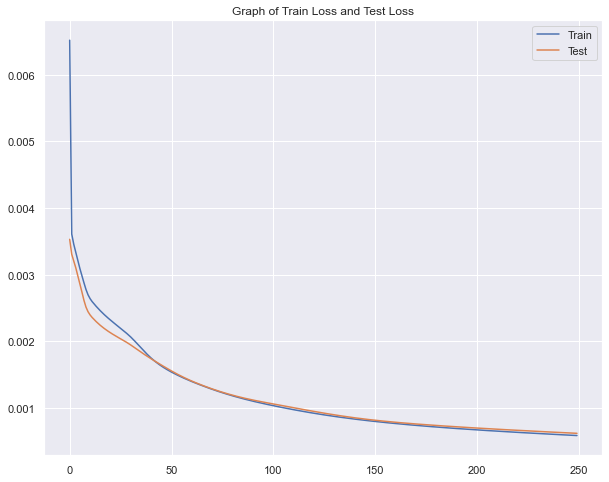

In [70]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.title("Graph of Train Loss and Test Loss") 
pyplot.legend()
pyplot.show()

In [71]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

5921/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test MSE: 0.000622


In [72]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.982
The R2 score on the Test set is:	0.980


**R2= 1- SSres / SStot                                                                                                         
where:                                                                                                                         
SSres is the sum of squares of the residual errors                                                                             
SStot is the total sum of the errors**                                                                                         

In [73]:
mae = metrics.mean_absolute_error(Y_Test, y_pred_test_lstm)
mse = metrics.mean_squared_error(Y_Test, y_pred_test_lstm)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(Y_Test,y_pred_test_lstm)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.01804239477104811
MSE: 0.0006216616948591546
RMSE: 0.024933144504036282
R-Squared: 0.9795618622837468


In [ ]:
###########################################################################################################################